#Download Dataset from Kaggle


---



In [ ]:
!mkdir ~/.kaggle
!echo '{"username":"sugamg","key":"1792e2ee754d04b48e513a662449d614"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download sugamg/wildlife-aerial-imagery-dataset
!unzip wildlife-aerial-imagery-dataset.zip

In [ ]:
#install ultralytics
! pip install ultralytics

Cloning repo from github for trained weights

In [ ]:
!git clone "https://github.com/sugam-ganachari/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery.git"

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import torch

C:\Users\SUGAM\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


#Training Model

In [ ]:
# Load the YOLOv10 model
# model = YOLO(r'C:\Users\keesa\Downloads\Traffic violation.v4i.yolov9\yolov10m.pt')  # Replace with your weights path if different
model = YOLO("/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/Models/yolov11n.pt")
# Check if GPU is available and set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)  # Move model to GPU if available

# Print whether GPU is being used
if device == 'cuda':
    print("Using GPU for training.")
else:
    print("Using CPU for training.")

# Specify the path to your dataset YAML file
data_path = "/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/data.yaml"

# Training the model with decreased epochs and early stopping
results = model.train(
    data=data_path,
    epochs=75,          # Maximum epochs
    imgsz=512,
    batch=8,
    patience=10,
    amp = False# Number of epochs with no improvement after which training will be stopped
)

# Print results
print(results)


Using GPU for training.
New https://pypi.org/project/ultralytics/8.3.91 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=C:/Users/SUGAM/Desktop/Major_Project/yolo11n.pt, data=C:/Users/SUGAM/Desktop/Major_Project/data.yaml, epochs=75, time=None, patience=10, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

train: Scanning C:\Users\SUGAM\Desktop\Major_Project\WAID-final - Copy\labels\train.cache... 1953 images, 0 backgrounds
val: Scanning C:\Users\SUGAM\Desktop\Major_Project\WAID-final - Copy\labels\test.cache... 402 images, 0 backgrounds, 0 


Plotting labels to C:\Users\SUGAM\runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to C:\Users\SUGAM\runs\detect\train15
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      1.76G      2.204      3.317      1.332          9        512: 100%|██████████| 245/245 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05

                   all        402       4770      0.473      0.403      0.379      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      1.65G      2.138      2.017      1.307         18        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.618      0.506      0.529      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.08G      2.062      1.736      1.316         19        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.667      0.549      0.564      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      1.66G      2.033      1.581      1.319         28        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.74      0.585      0.631      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      1.65G      1.982      1.493      1.299          4        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.751      0.613      0.677      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      1.74G      1.957      1.383      1.285         13        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.678      0.675      0.674      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      1.78G       1.94      1.375      1.276         11        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.736      0.649      0.681      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75       1.7G       1.93      1.294       1.27          4        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.768      0.647      0.708      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      1.74G      1.901      1.258      1.259         17        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.728      0.645      0.706       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      1.79G       1.88      1.212      1.251         13        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.766      0.688      0.749      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      1.72G      1.884      1.196      1.247          3        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.815      0.705      0.756       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      1.73G      1.878      1.186      1.238          9        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.82      0.697      0.753      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      1.67G      1.845       1.15      1.232         19        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.823      0.708      0.763      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      1.78G      1.839      1.113      1.218          6        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.811      0.692      0.762      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      1.78G      1.815      1.108      1.229          5        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.843      0.697      0.775      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      1.73G      1.813      1.081      1.212         26        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.771      0.734      0.778      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      1.62G      1.798      1.069       1.21         22        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.789        0.7      0.764      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      1.81G      1.815      1.048      1.204         12        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.806      0.694      0.783      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      1.67G      1.781      1.033      1.207          7        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.798      0.676      0.744       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      1.73G      1.804      1.028      1.202          1        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.833      0.725      0.806      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      1.84G      1.777       1.01      1.197         25        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.795      0.733      0.786      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      1.91G      1.789      1.014      1.205          2        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.829      0.722      0.782      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      1.66G      1.782     0.9953      1.198         11        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.808      0.734      0.802      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      1.83G      1.761      0.972      1.191         18        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.786      0.777      0.805      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      1.87G       1.73     0.9628      1.181         23        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.844      0.749      0.828      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      1.72G      1.743      0.959      1.186         39        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.84      0.751      0.825      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      1.57G      1.737      0.959      1.182         11        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.844      0.735      0.801      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      2.02G      1.737     0.9503      1.183         10        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.794       0.75      0.794      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      1.71G      1.733     0.9486      1.179         32        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.835      0.762      0.819      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      1.74G      1.722     0.9271      1.171         25        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.838      0.764      0.825      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      1.55G      1.716      0.919      1.164          4        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.85      0.757      0.831      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      1.69G      1.717     0.9214      1.169          2        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.842      0.745      0.824       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      1.89G      1.715      0.915      1.176         27        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.856       0.75      0.831      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      1.85G      1.706     0.9015      1.162          3        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.835      0.762      0.825      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      1.72G      1.692     0.8872      1.155         15        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.85      0.782      0.851      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      1.75G      1.702     0.8921      1.152          1        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.862      0.764      0.834      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      1.66G      1.666     0.8726      1.152          4        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.85      0.756      0.823      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      1.78G      1.696     0.8879      1.144         11        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.828      0.778      0.839      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      1.71G      1.656     0.8655      1.152         18        512: 100%|██████████| 245/245 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.816      0.802      0.839      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      1.73G      1.669     0.8698       1.16         25        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.881       0.79      0.851      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      1.72G      1.645     0.8528      1.146          7        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.863      0.766      0.846      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      1.92G      1.656     0.8479      1.139          8        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.851      0.804       0.86      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      1.72G      1.643     0.8428      1.138         16        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.88      0.796      0.859      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      1.68G      1.643     0.8487      1.144         21        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.831      0.771      0.837      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      1.73G      1.638     0.8395      1.129         16        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.834       0.78      0.836      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      1.84G      1.627     0.8324      1.126         19        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.852      0.799      0.858      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      1.84G      1.626     0.8342      1.133         24        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.876      0.804      0.873      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      1.84G      1.635     0.8303      1.134         15        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.872      0.797       0.87      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      1.81G      1.619     0.8166      1.128         48        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.851      0.795      0.857      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      1.84G      1.617     0.8184      1.125         16        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.869      0.804      0.865      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      1.81G      1.598     0.8166      1.117         11        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.878       0.81      0.876      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      1.86G      1.597     0.8086      1.124          6        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05

                   all        402       4770      0.879      0.816      0.881      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      1.74G      1.589     0.7946       1.12          1        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.859      0.819      0.877      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75       1.7G      1.595     0.8041      1.118          4        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.903       0.79      0.875      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      1.89G      1.591     0.7903      1.115         66        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.826      0.799      0.847      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      1.73G      1.596     0.7926      1.118         49        512: 100%|██████████| 245/245 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.874      0.814      0.875      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      1.69G      1.556     0.7792      1.103          3        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.873      0.819      0.886      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      1.84G      1.584     0.7881      1.113         15        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.877      0.821      0.882      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      1.86G      1.563     0.7747      1.106         14        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.872      0.834      0.887      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      1.82G      1.572     0.7753      1.102          7        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.863      0.838      0.882      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      1.77G      1.553     0.7697        1.1          7        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.873       0.83      0.888      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      1.96G      1.565     0.7795      1.101         10        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.896      0.825       0.89      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      1.78G      1.548       0.77      1.097         11        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.866      0.821      0.881      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75       1.8G       1.55      0.766      1.093         15        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.911       0.83      0.894      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      1.94G      1.547     0.7698      1.102         28        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.881      0.837       0.89      0.487


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75       1.6G      1.538     0.7386       1.11         23        512: 100%|██████████| 245/245 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05

                   all        402       4770      0.888      0.818      0.878      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      1.66G      1.509     0.7217      1.102         30        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.885      0.835      0.889       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      1.56G        1.5     0.7239      1.102          2        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.855      0.832      0.884      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      1.61G      1.497     0.7122      1.101         10        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.865      0.846      0.889      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      1.56G        1.5     0.7149      1.096          7        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.884      0.834      0.893      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      1.57G      1.481     0.7358      1.084          1        512: 100%|██████████| 245/245 [00:51<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.881      0.831      0.884      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      1.62G      1.493     0.7116      1.098         25        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.896       0.83      0.893      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75       1.6G      1.472      0.697      1.083         23        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770      0.889      0.838       0.89       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      1.54G      1.465     0.7064       1.09          2        512: 100%|██████████| 245/245 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04

                   all        402       4770       0.88      0.841      0.892      0.478
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 64, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



74 epochs completed in 1.195 hours.
Optimizer stripped from C:\Users\SUGAM\runs\detect\train15\weights\last.pt, 5.5MB
Optimizer stripped from C:\Users\SUGAM\runs\detect\train15\weights\best.pt, 5.5MB

Validating C:\Users\SUGAM\runs\detect\train15\weights\best.pt...
Ultralytics 8.3.65  Python-3.10.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05


                   all        402       4770      0.911       0.83      0.894      0.491
                 sheep         60       1972      0.897      0.825      0.899      0.479
                cattle         60        799      0.914      0.856      0.922      0.567
                  seal         60        425      0.882      0.929      0.957      0.627
                 kiang         60        470      0.875      0.688      0.806      0.412
               camelus         60        369       0.85      0.805       0.85       0.42
                 zebra         60        404      0.915      0.669      0.858      0.504
             crocodile          8          8      0.952          1      0.995      0.635
              elephant         18        293      0.843      0.666      0.757      0.254
                  deer          8          8          1      0.862      0.897      0.438
                 horse          8         22      0.981          1      0.995      0.571
Speed: 0.3ms preproce

In [ ]:
import torch
import torchvision

print(torch.__version__)  # Ensure this matches the installed torchvision version
print(torchvision.__version__)
print(torch.cuda.is_available())  # Check if CUDA is available
print(torchvision.ops.nms)  # Ensure NMS is correctly available

2.6.0+cu124
0.21.0+cu124
True
<function nms at 0x0000027440ACAB00>


In [ ]:
# pip uninstall torchvision

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# model.save("yolov11_final.pt")

#Load the Saved Model

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import torch
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

model = YOLO("/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/TrainedModels/trained_yolov11.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)  # Move model to GPU if available
data_path = "/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/data.yaml"
# Print whether GPU is being used
if device == 'cuda':
    print("Using GPU for training.")
else:
    print("Using CPU for training.")


C:\Users\SUGAM\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Using GPU for training.


In [ ]:
# Validation on the test set and specify the classes
test_results = model.val(
    data=data_path,          # Reuse the same data YAML file
    split='test',            # Use the test set
    task='detect',           # Specify the task (optional, based on context)
    conf=0.25,               # Confidence threshold (adjust if needed)
    iou=0.45                # IoU threshold for NMS
#     classes=[0, 1, 2, 4, 8]  # Specify the classes to evaluate
)

# Extract and print the confusion matrix
print("Confusion Matrix for selected classes:")
print(test_results.confusion_matrix)


YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\SUGAM\Desktop\Major_Project\WAID-final - Copy\labels\test.cache... 402 images, 0 backgrounds, 0 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10


                   all        402       4770      0.933      0.837      0.908      0.532
                 sheep         60       1972      0.952      0.827      0.915      0.513
                cattle         60        799      0.931       0.86      0.931      0.614
                  seal         60        425      0.891      0.927      0.952      0.652
                 kiang         60        470       0.91      0.704      0.839      0.467
               camelus         60        369      0.859       0.81      0.874      0.467
                 zebra         60        404      0.934      0.695      0.865      0.557
             crocodile          8          8          1          1      0.995      0.663
              elephant         18        293      0.855      0.676      0.796      0.296
                  deer          8          8          1      0.875      0.915      0.467
                 horse          8         22          1          1      0.995      0.625
Speed: 0.5ms preproce

In [ ]:
import cv2
import matplotlib.pyplot as plt
def draw_predictions(image_path, model, box_color=(0, 255, 0), text_color=(255, 0, 0), conf_threshold=0.5):
    # Read the image
    if type(image_path) is str:
        image = cv2.imread(image_path)
    else:
        image = image_path
    # Run prediction
    results = model.predict(image_path)

    for result in results:
        for box in result.boxes:
            conf = box.conf[0]  # Confidence score

            if conf >= conf_threshold:  # Filter by confidence threshold
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
                class_id = int(box.cls[0])  # Class ID
                class_name = model.names[class_id]  # Class label

                # Draw bounding box
                cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 2)

                # Add label and confidence score
                label = f'{class_name} {conf:.2f}'
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)

    # Convert BGR to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     Display the image
#     plt.imshow(image_rgb)
#     plt.axis('off')
#     plt.show()
    return results

In [ ]:
def tensor_to_image(tensor):
    image_tensor = tensor.squeeze(0).permute(1, 2, 0).detach().clamp(0, 1)
    image_numpy = (image_tensor.numpy() * 255).astype(np.uint8)
    return Image.fromarray(image_numpy)

#MultiScale Feature Extracion & Fusion Encoder/Module

In [ ]:
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from PIL import Image

torch.manual_seed(42)
torch.cuda.manual_seed(42)
np.random.seed(42)
random.seed(42)

def multiscale_feature_extraction(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_tensor = torch.from_numpy(image).float().permute(2, 0, 1).unsqueeze(0) / 255.0  # Shape: [1, 3, H, W]

    def conv1x1(in_channels):
        conv = nn.Conv2d(in_channels, in_channels, kernel_size=1, bias=False)
        nn.init.eye_(conv.weight[:, :, 0, 0])  # Identity transformation
        return conv

    conv_layer = conv1x1(3)

    L0 = F.interpolate(image_tensor, size=(512, 512), mode="bilinear", align_corners=False)  # Large
    M0 = F.interpolate(image_tensor, size=(384, 384), mode="bilinear", align_corners=False)  # Medium
    S0 = F.interpolate(image_tensor, size=(256, 256), mode="bilinear", align_corners=False)  # Small

    L0 = conv_layer(L0)
    M0 = conv_layer(M0)
    S0 = conv_layer(S0)

    s1 = conv_layer(S0)
    m2 = conv_layer(M0)

    s1_upsampled = F.interpolate(s1, size=(384, 384), mode='bilinear', align_corners=False)
    s1_m2 = torch.cat((s1_upsampled, m2), dim=1)

    conv_layer_2 = nn.Conv2d(s1_m2.shape[1], 3, kernel_size=1, bias=False)
    nn.init.eye_(conv_layer_2.weight[:, :, 0, 0])

    m2_combined = conv_layer_2(s1_m2)
    m2_combined_upsampled = F.interpolate(m2_combined, size=(512, 512), mode='bilinear', align_corners=False)
    l1_m2 = torch.cat((L0, m2_combined_upsampled), dim=1)

    yolo_head_1 = conv_layer(s1)
    yolo_head_2 = conv_layer(m2_combined)
    yolo_head_3 = conv_layer_2(l1_m2)

    def tensor_to_image(tensor):
        image_tensor = tensor.squeeze(0).permute(1, 2, 0).detach().clamp(0, 1)
        image_numpy = (image_tensor.numpy() * 255).astype(np.uint8)
        return Image.fromarray(image_numpy)

    tensor_to_image(yolo_head_1)
    tensor_to_image(yolo_head_2)
    tensor_to_image(yolo_head_3)

#     print("✅ YOLO Head 1 (S0, 256x256):", yolo_head_1.shape)
#     print("✅ YOLO Head 2 (M0, 384x384) :", yolo_head_2.shape)
#     print("✅ YOLO Head 3 (L0, 512x512):", yolo_head_3.shape)

    return yolo_head_1, yolo_head_2, yolo_head_3


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

def yolo_to_xyxy(box, img_width, img_height):
    """
    Convert YOLO format [x_center, y_center, width, height] to [x1, y1, x2, y2].
    """
    x_center, y_center, width, height = box
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) between two bounding boxes.
    Each box is defined as [x1, y1, x2, y2].
    """
    # Determine the coordinates of the intersection rectangle
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Compute the area of intersection
    intersection = max(0, x2 - x1) * max(0, y2 - y1)

    # Compute the area of both bounding boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute IoU
    iou = intersection / float(box1_area + box2_area - intersection)
    return iou

def load_ground_truth(label_path, img_width, img_height):
    """
    Load ground truth bounding boxes from a label file and convert them to [x1, y1, x2, y2] format.
    """
    ground_truth_boxes = []
    with open(label_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            box = yolo_to_xyxy([x_center, y_center, width, height], img_width, img_height)
            ground_truth_boxes.append(box)
    return ground_truth_boxes

def compare_predictions(image1_results, image2_results, ground_truth_boxes):
    """
    Compare predictions of two images using confidence scores, number of detections,
    precision, recall, IoU, and inference time.
    """
    # Access the first element in the results list
#     image1_results = image1_results[0]
#     image2_results = image2_results[0]

    # Extract confidence scores
    image1_confidences = image1_results.boxes.conf.cpu().numpy()  # Convert to numpy array
    image2_confidences = image2_results.boxes.conf.cpu().numpy()  # Convert to numpy array

    # Number of detections
    image1_num_detections = len(image1_confidences)
    image2_num_detections = len(image2_confidences)

    # Inference time
    image1_inference_time = image1_results.speed['inference']
    image2_inference_time = image2_results.speed['inference']

    # Precision and Recall
    # Create y_true (all 1s for ground truth boxes)
    y_true = [1] * len(ground_truth_boxes)

    # Create y_pred for image 1
    image1_preds = [1] * image1_num_detections
    if len(image1_preds) < len(y_true):
        image1_preds += [0] * (len(y_true) - len(image1_preds))  # Pad with 0s
    elif len(image1_preds) > len(y_true):
        image1_preds = image1_preds[:len(y_true)]  # Truncate to match length

    # Create y_pred for image 2
    image2_preds = [1] * image2_num_detections
    if len(image2_preds) < len(y_true):
        image2_preds += [0] * (len(y_true) - len(image2_preds))  # Pad with 0s
    elif len(image2_preds) > len(y_true):
        image2_preds = image2_preds[:len(y_true)]  # Truncate to match length

    # Calculate precision and recall
    image1_precision = precision_score(y_true, image1_preds, zero_division=0)
    image1_recall = recall_score(y_true, image1_preds, zero_division=0)
    image2_precision = precision_score(y_true, image2_preds, zero_division=0)
    image2_recall = recall_score(y_true, image2_preds, zero_division=0)

    # Average IoU
    image1_ious = []
    for pred_box in image1_results.boxes.xyxy.cpu().numpy():  # Convert to numpy array
        ious = [calculate_iou(pred_box, gt_box) for gt_box in ground_truth_boxes]
        image1_ious.append(max(ious))
    image1_avg_iou = np.mean(image1_ious) if image1_ious else 0

    image2_ious = []
    for pred_box in image2_results.boxes.xyxy.cpu().numpy():  # Convert to numpy array
        ious = [calculate_iou(pred_box, gt_box) for gt_box in ground_truth_boxes]
        image2_ious.append(max(ious))
    image2_avg_iou = np.mean(image2_ious) if image2_ious else 0

    image1_avg_confidence = sum(image1_confidences) / image1_num_detections if image1_num_detections > 0 else 0
    image2_avg_confidence = sum(image2_confidences) / image2_num_detections if image2_num_detections > 0 else 0

    # Print comparison results
#     print("Comparison Results:")
#     print(f"Image 1 - Avg Confidence Score: {image1_avg_confidence}")
#     print(f"Image 2 - Avg Confidence Score: {image2_avg_confidence}")
#     print(f"Image 1 - Number of Detections: {image1_num_detections}")
#     print(f"Image 2 - Number of Detections: {image2_num_detections}")
#     print(f"Image 1 - Inference Time: {image1_inference_time} ms")
#     print(f"Image 2 - Inference Time: {image2_inference_time} ms")
#     print(f"Image 1 - Precision: {image1_precision}, Recall: {image1_recall}, Avg IoU: {image1_avg_iou}")
#     print(f"Image 2 - Precision: {image2_precision}, Recall: {image2_recall}, Avg IoU: {image2_avg_iou}")

    return (image1_avg_confidence, image2_avg_confidence,
    image1_num_detections, image2_num_detections,
    image1_inference_time, image2_inference_time,
    image1_precision, image1_recall, image1_avg_iou,
    image2_precision, image2_recall, image2_avg_iou)

Comparing With/Without Multiscale Feature Extraction using YOLOv11

In [ ]:

k = 2500
num_iterations = 400

# Initialize accumulators for averaging
total_image1_confidence = 0
total_image2_confidence = 0
total_image1_detections = 0
total_image2_detections = 0
total_image1_inference_time = 0
total_image2_inference_time = 0
total_image1_precision = 0
total_image1_recall = 0
total_image1_iou = 0
total_image2_precision = 0
total_image2_recall = 0
total_image2_iou = 0

for i in range(num_iterations):
    img_width, img_height = 512, 512  # Image dimensions
    label_path = f"/content/WAID-final - Copy/labels/test/dataset_{k+i}.txt"
    ground_truth_boxes = load_ground_truth(label_path, img_width, img_height)

    image_path = f"/content/WAID-final - Copy/images/test/dataset_{k+i}.jpg"
    if not os.path.exists(image_path):
        image_path = image_path.replace(".jpg", ".JPG")  # Try .JPG extension
        if not os.path.exists(image_path):
            print(f"Image file not found: dataset_{k+i}.jpg or dataset_{k+i}.JPG")
            continue  # Skip to the next iteration
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (256, 256))

    fi_1 = draw_predictions(
        image_path=resized_image,
        model=model,
        box_color=(0, 255, 0),  # Green bounding box
        text_color=(255, 0, 0),  # Blue text
        conf_threshold=0.5
    )

    yolo_head_1, yolo_head_2, yolo_head_3 = multiscale_feature_extraction(image_path)
    predict_img = tensor_to_image(yolo_head_3)
    predict_img = np.array(predict_img)  # Convert PIL image to NumPy
    predict_img = cv2.cvtColor(predict_img, cv2.COLOR_RGB2BGR)

    fi_2 = draw_predictions(
        image_path=predict_img,
        model=model,
        box_color=(0, 255, 0),  # Green bounding box
        text_color=(255, 0, 0),  # Blue text
        conf_threshold=0.5
    )

    # Get comparison metrics
    (img1_conf, img2_conf, img1_det, img2_det, img1_time, img2_time,
     img1_prec, img1_rec, img1_iou, img2_prec, img2_rec, img2_iou) = compare_predictions(fi_1[0], fi_2[0], ground_truth_boxes)

    # Accumulate results
    total_image1_confidence += img1_conf
    total_image2_confidence += img2_conf
    total_image1_detections += img1_det
    total_image2_detections += img2_det
    total_image1_inference_time += img1_time
    total_image2_inference_time += img2_time
    total_image1_precision += img1_prec
    total_image1_recall += img1_rec
    total_image1_iou += img1_iou
    total_image2_precision += img2_prec
    total_image2_recall += img2_rec
    total_image2_iou += img2_iou

# Compute averages
average_image1_confidence = total_image1_confidence / num_iterations
average_image2_confidence = total_image2_confidence / num_iterations
average_image1_detections = total_image1_detections / num_iterations
average_image2_detections = total_image2_detections / num_iterations
average_image1_inference_time = total_image1_inference_time / num_iterations
average_image2_inference_time = total_image2_inference_time / num_iterations
average_image1_precision = total_image1_precision / num_iterations
average_image1_recall = total_image1_recall / num_iterations
average_image1_iou = total_image1_iou / num_iterations
average_image2_precision = total_image2_precision / num_iterations
average_image2_recall = total_image2_recall / num_iterations
average_image2_iou = total_image2_iou / num_iterations

# Print final averaged results
print("\nFinal Averaged Results:")
print(f"Avg Image 1 Confidence Score: {average_image1_confidence}")
print(f"Avg Image 2 Confidence Score: {average_image2_confidence}")
print(f"Avg Image 1 Detections: {average_image1_detections}")
print(f"Avg Image 2 Detections: {average_image2_detections}")
print(f"Avg Image 1 Inference Time: {average_image1_inference_time} ms")
print(f"Avg Image 2 Inference Time: {average_image2_inference_time} ms")
print(f"Avg Image 1 Precision: {average_image1_precision}, Recall: {average_image1_recall}, IoU: {average_image1_iou}")
print(f"Avg Image 2 Precision: {average_image2_precision}, Recall: {average_image2_recall}, IoU: {average_image2_iou}")



0: 512x512 20 elephants, 13.0ms
Speed: 13.3ms preprocess, 13.0ms inference, 482.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 20 elephants, 36.1ms
Speed: 1.6ms preprocess, 36.1ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 9 cattles, 14.5ms
Speed: 3.0ms preprocess, 14.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 9 cattles, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 deer, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 6.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 deer, 18.0ms
Speed: 1.0ms preprocess, 18.0ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 (no detections), 20.1ms
Speed: 2.0ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 deer, 22.1ms
Speed: 3.0ms preprocess, 22.1ms inference, 4.0ms postprocess per image at s


0: 512x512 34 cattles, 12.5ms
Speed: 1.0ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 9 elephants, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 9 elephants, 18.6ms
Speed: 1.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 21 seals, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 20 seals, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 8 seals, 21.0ms
Speed: 2.3ms preprocess, 21.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 9 seals, 20.5ms
Speed: 2.0ms preprocess, 20.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 seal, 14.1ms
Speed: 3.0ms preprocess, 14.1ms inference, 1.2ms postprocess per image at shape (1, 3


0: 512x512 3 seals, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 38 seals, 20.6ms
Speed: 3.3ms preprocess, 20.6ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 37 seals, 17.5ms
Speed: 1.0ms preprocess, 17.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 4 seals, 11.5ms
Speed: 2.5ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 4 seals, 18.0ms
Speed: 1.0ms preprocess, 18.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 seals, 28.5ms
Speed: 2.0ms preprocess, 28.5ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 seal, 38.1ms
Speed: 2.0ms preprocess, 38.1ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 24 seals, 22.1ms
Speed: 3.0ms preprocess, 22.1ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512


0: 512x512 27 cattles, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 26 cattles, 17.1ms
Speed: 2.0ms preprocess, 17.1ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 5 cattles, 12.1ms
Speed: 1.0ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 cattles, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 10 cattles, 12.6ms
Speed: 1.0ms preprocess, 12.6ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 10 cattles, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 16 sheeps, 13.0ms
Speed: 4.6ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 16 sheeps, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.0ms postprocess per image at sha

Speed: 2.0ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 13 elephants, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 45 elephants, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 54 elephants, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 horses, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 horses, 13.5ms
Speed: 1.5ms preprocess, 13.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 horses, 11.1ms
Speed: 1.5ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 horses, 11.8ms
Speed: 1.0ms preprocess, 11.8ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x5


0: 512x512 29 kiangs, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 14 kiangs, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 15 kiangs, 11.7ms
Speed: 1.0ms preprocess, 11.7ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 16 kiangs, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 18 kiangs, 20.1ms
Speed: 3.0ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 22 kiangs, 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 19 kiangs, 11.5ms
Speed: 0.9ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 kiangs, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 3.0ms postprocess per image at shape (1

Speed: 0.9ms preprocess, 16.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 6 kiangs, 12.3ms
Speed: 1.0ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 14 kiangs, 22.1ms
Speed: 2.0ms preprocess, 22.1ms inference, 16.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 19 kiangs, 11.5ms
Speed: 2.4ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 17 kiangs, 12.1ms
Speed: 0.9ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 10 kiangs, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 14 kiangs, 11.0ms
Speed: 1.5ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 4 kiangs, 12.1ms
Speed: 0.9ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 5 k


0: 512x512 10 cattles, 11.7ms
Speed: 1.0ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 11 cattles, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 22 cattles, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 23 cattles, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 zebras, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 zebras, 12.2ms
Speed: 1.0ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 12 zebras, 12.5ms
Speed: 1.0ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 11 zebras, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape


0: 512x512 1 zebra, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 zebra, 12.6ms
Speed: 1.0ms preprocess, 12.6ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 zebras, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 zebra, 16.0ms
Speed: 2.5ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 zebra, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 6 zebras, 11.0ms
Speed: 2.5ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 5 zebras, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 zebras, 20 elephants, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape


0: 512x512 9 cattles, 16.5ms
Speed: 2.1ms preprocess, 16.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 10 cattles, 18.1ms
Speed: 2.0ms preprocess, 18.1ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 27 cattles, 26.1ms
Speed: 2.5ms preprocess, 26.1ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 27 cattles, 14.2ms
Speed: 1.5ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 8 cattles, 24.2ms
Speed: 4.0ms preprocess, 24.2ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 8 cattles, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 19 cameluss, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 28 cameluss, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 3.0ms postprocess per image at 


0: 512x512 11 cameluss, 1 zebra, 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 8 cameluss, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 10 cameluss, 1 zebra, 14.1ms
Speed: 1.0ms preprocess, 14.1ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 9 cameluss, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 14 cameluss, 13.0ms
Speed: 2.5ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 4 cameluss, 20.1ms
Speed: 2.0ms preprocess, 20.1ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 5 cameluss, 16.5ms
Speed: 1.0ms preprocess, 16.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 4 cameluss, 18.0ms
Speed: 1.0ms preprocess, 18.0ms inference, 1.0ms pos


0: 512x512 8 cameluss, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 12 cameluss, 15.1ms
Speed: 2.5ms preprocess, 15.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 13 cameluss, 14.6ms
Speed: 1.0ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 15 cattles, 14.6ms
Speed: 3.0ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 17 cattles, 19.6ms
Speed: 2.0ms preprocess, 19.6ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 31 cattles, 21.1ms
Speed: 1.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 31 cattles, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 6 cattles, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.5ms postprocess per image a


0: 512x512 13 sheeps, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 13 sheeps, 12.0ms
Speed: 0.9ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 13 sheeps, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 13 sheeps, 21.0ms
Speed: 1.5ms preprocess, 21.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 11 sheeps, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 11 sheeps, 17.0ms
Speed: 1.0ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 13 sheeps, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 14 sheeps, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (

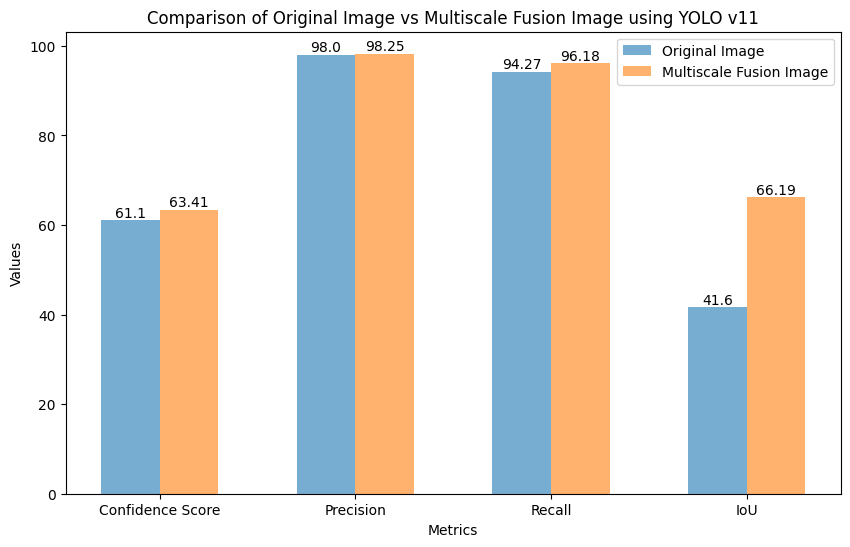

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ["Confidence Score", "Precision", "Recall", "IoU"]
image1_values = [61.10, 98, 94.27, 41.6]
image2_values = [63.41, 98.25, 96.18, 66.19]

# Create bar width
bar_width = 0.3
index = np.arange(len(metrics))

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width/2, image1_values, bar_width, label="Original Image", color='#1F77B4', alpha=0.6)
bar2 = ax.bar(index + bar_width/2, image2_values, bar_width, label="Multiscale Fusion Image", color='#FF7F0E', alpha=0.6)

# Labels and title
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Comparison of Original Image vs Multiscale Fusion Image using YOLO v11")
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Show plot
plt.show()


In [ ]:
image_path_1 = "/content/WAID-final - Copy/images/test/dataset_2500.jpg"
image_path_1 = cv2.imread(image_path_1)
final_img = cv2.resize(image_path_1,(256,256))


0: 512x512 20 elephants, 13.5ms
Speed: 3.0ms preprocess, 13.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


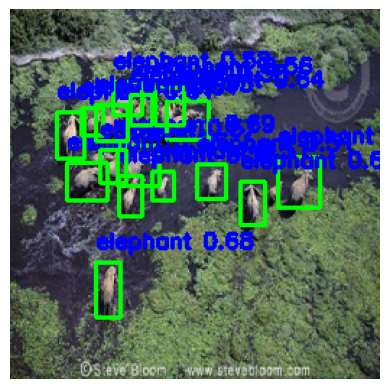

In [ ]:
# Example usage
fi_1 = draw_predictions(
    image_path=final_img,
    model=model,
    box_color=(0, 255, 0),  # Green bounding box
    text_color=(255, 0, 0),  # Blue text
    conf_threshold=0.5  # Minimum confidence to display
)


0: 512x512 20 elephants, 11.5ms
Speed: 22.3ms preprocess, 11.5ms inference, 658.5ms postprocess per image at shape (1, 3, 512, 512)


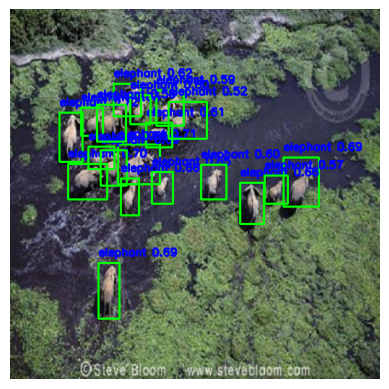

In [ ]:
# Example usage
predict_img = tensor_to_image(yolo_head_3)
predict_img = np.array(predict_img)  # Convert PIL image to NumPy

# Ensure correct format (BGR for OpenCV)
predict_img = cv2.cvtColor(predict_img, cv2.COLOR_RGB2BGR)
fi_2 = draw_predictions(
    image_path=predict_img,
    model=model,
    box_color=(0, 255, 0),  # Green bounding box
    text_color=(255, 0, 0),  # Blue text
    conf_threshold=0.5  # Minimum confidence to display
)

In [ ]:
yolo_head_1, yolo_head_2, yolo_head_3 = multiscale_feature_extraction("/content/WAID-final - Copy/images/test/dataset_2500.jpg")